# <span style = "color : red"> <h2 style="text-align: center;"> Mushrooms clasification experiment </h2> </span>
 <h3 style="text-align: center;"> Let's GO </h3>

In [9]:
mushrooms_data_path="../NOTEBOOK/data/mashroom.csv"

In [39]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
from pathlib import Path
from joblib import dump

In [11]:
mdata= pd.read_csv(mushrooms_data_path)
mdata.sample(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
851,e,f,y,n,t,a,f,c,b,p,...,y,w,w,p,w,o,p,k,s,g
2436,e,f,f,g,t,n,f,c,b,p,...,s,w,g,p,w,o,p,n,y,d
6212,p,x,y,e,f,f,f,c,n,b,...,k,p,w,p,w,o,e,w,v,p
3483,p,x,s,w,f,c,f,c,n,u,...,s,w,w,p,w,o,p,n,v,d
3084,e,f,y,n,t,n,f,c,b,u,...,s,g,p,p,w,o,p,k,v,d


In [13]:
columns=mdata.columns
columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [14]:
mdata.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [15]:
for c in columns:
    print(c," ",mdata[c].unique())

class   ['p' 'e']
cap-shape   ['x' 'b' 's' 'f' 'k' 'c']
cap-surface   ['s' 'y' 'f' 'g']
cap-color   ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises   ['t' 'f']
odor   ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment   ['f' 'a']
gill-spacing   ['c' 'w']
gill-size   ['n' 'b']
gill-color   ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape   ['e' 't']
stalk-root   ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring   ['s' 'f' 'k' 'y']
stalk-surface-below-ring   ['s' 'f' 'y' 'k']
stalk-color-above-ring   ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring   ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type   ['p']
veil-color   ['w' 'n' 'o' 'y']
ring-number   ['o' 't' 'n']
ring-type   ['p' 'e' 'l' 'f' 'n']
spore-print-color   ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population   ['s' 'n' 'a' 'v' 'y' 'c']
habitat   ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [16]:
# importing Label encoder model
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder


# creating instacne
le=LabelEncoder()

# Transforming class into binary formate
mdata['class']=le.fit_transform(mdata['class'])

mdata.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [17]:
oe=OrdinalEncoder()


mdata[columns[1:]]=oe.fit_transform(mdata[columns[1:]])

mdata.sample(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3280,1,5.0,0.0,3.0,0.0,2.0,1.0,0.0,0.0,7.0,...,1.0,0.0,4.0,0.0,2.0,1.0,2.0,1.0,4.0,4.0
8066,1,3.0,2.0,2.0,0.0,2.0,1.0,0.0,1.0,0.0,...,1.0,7.0,7.0,0.0,2.0,1.0,0.0,7.0,4.0,4.0
1775,0,5.0,0.0,8.0,0.0,5.0,1.0,1.0,0.0,7.0,...,2.0,7.0,7.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0
1309,0,2.0,2.0,3.0,0.0,5.0,1.0,1.0,0.0,7.0,...,2.0,7.0,7.0,0.0,2.0,1.0,0.0,3.0,3.0,1.0
2710,0,5.0,3.0,4.0,1.0,5.0,1.0,0.0,0.0,9.0,...,2.0,3.0,7.0,0.0,2.0,1.0,4.0,2.0,4.0,0.0


In [18]:
mdata.shape

(8124, 23)

In [19]:
X_label=columns[1:]
y_label=columns[0]

In [20]:
X=mdata[X_label]
y=mdata[y_label]

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6499, 22), (1625, 22), (6499,), (1625,))

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [23]:
gbc=GradientBoostingClassifier(max_depth=5,random_state=42)
f1_score_list=[]

In [24]:
for k in range(1,14):

    selector=SelectKBest(mutual_info_classif,k=k)
    selector.fit(X_train,y_train)
    
    sel_X_train=selector.transform(X_train)
    sel_X_test=selector.transform(X_test)


    gbc.fit(sel_X_train,y_train)
    kbest_preds=gbc.predict(sel_X_test)

    f1_score_kbest=round(f1_score(y_true=y_test,y_pred=kbest_preds,average='weighted'),3)
    f1_score_list.append(f1_score_kbest)


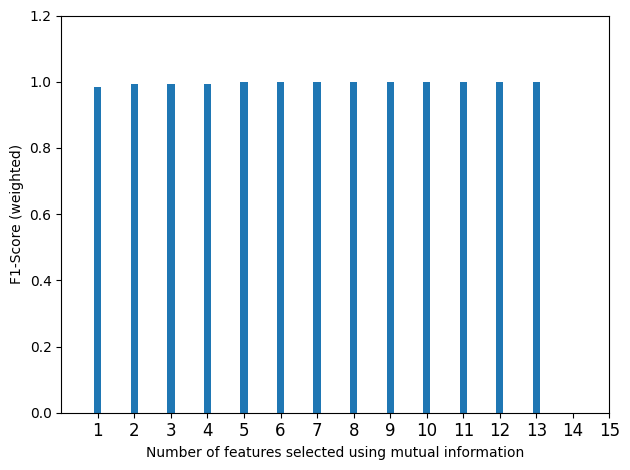

In [25]:
fig,ax=plt.subplots()

x=np.arange(1,14)
y=f1_score_list

ax.bar(x, y, width=0.2)
ax.set_xlabel('Number of features selected using mutual information')
ax.set_ylabel('F1-Score (weighted)')
ax.set_xlim(0,15)
ax.set_ylim(0, 1.2)
ax.set_xticks(np.arange(1, 16))
ax.set_xticklabels(np.arange(1, 16), fontsize=12)

# for i, v in enumerate(y):
#     plt.text(x=i+1, y=v+0.05, s=str(v), ha='center')
    
plt.tight_layout()

In [26]:
print(mutual_info_classif)
selector=SelectKBest(mutual_info_classif,k=9)
print(selector)
selector.fit(X_train,y_train)
select_feature_mask=selector.get_support()
print(select_feature_mask)
selected_features=X_train.columns[select_feature_mask]
print(selected_features)

<function mutual_info_classif at 0x0000026AD2933760>
SelectKBest(k=9,
            score_func=<function mutual_info_classif at 0x0000026AD2933760>)
[False False False False  True False False  True  True False False  True
  True  True  True False False False  True  True False False]
Index(['odor', 'gill-size', 'gill-color', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'ring-type', 'spore-print-color'],
      dtype='object')


In [27]:
selected_features=list(selected_features)
selected_features.append('class')
selected_features

['odor',
 'gill-size',
 'gill-color',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'ring-type',
 'spore-print-color',
 'class']

In [29]:
# SO modified dataframe will be

version_1=pd.read_csv(mushrooms_data_path)
final_data=version_1[selected_features]
final_data.sample(5)


,odor,gill-size,gill-color,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,class
6272,s,n,b,s,k,p,p,e,w,p
6703,s,n,b,k,s,w,w,e,w,p
6676,s,n,b,k,k,w,w,e,w,p
4129,n,b,p,s,s,g,g,p,k,e
3308,n,b,p,s,s,p,p,p,k,e


In [44]:
final_data.to_csv("../NOTEBOOK/data/mushrooms_final.csv",index=False)

In [32]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('encoder', OrdinalEncoder()),
    ('gbc', GradientBoostingClassifier(max_depth=5, random_state=42))
])



In [33]:
X = final_data.drop(['class'], axis=1)
y = final_data['class']

pipe.fit(X, y)

Pipeline(steps=[('encoder', OrdinalEncoder()),
                ('gbc',
                 GradientBoostingClassifier(max_depth=5, random_state=42))])

In [34]:
pipe.score(X,y)

1.0

In [35]:
X_pred = np.array(['p','n','k','s','s','w','w','p','k'])
X_pred = X_pred.reshape(1, -1)
pred = pipe.predict(X_pred)
pred

c:\Users\shafe\anaconda3\envs\streamDev\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array(['p'], dtype=object)

In [36]:
pred[0]

'p'

In [42]:
model_path=Path("../NOTEBOOK/model")

if model_path.is_dir():
    print("path exist , skipping creation")

else:
    model_path.mkdir(parents=True,
                     exist_ok=True)
    print("Path directory created....")

Path directory created....


In [43]:
model_file_path=Path("mushrooms_model.joblib")

if model_file_path.exists():
    print("model file exist , no need to recreate....")
else:
    dump(pipe,"../NOTEBOOK/model/mushrooms_model.joblib")
    print("model file saved successfully......")

model file loaded successfully......


# End of Model Building